In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan_level_500k.csv


In [3]:
#import H2O and other libraries that will be sued in this tutorial

import h2o
import matplotlib as plt
%matplotlib inline

#import the Estimators
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

#import h2o grid search
import h2o.grid
from h2o.grid.grid_search import H2OGridSearch
print('Setup Complete')


Setup Complete


In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7scqh_uk
  JVM stdout: /tmp/tmp7scqh_uk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7scqh_uk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_l8cqc0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.250 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
loan_level.head()

CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
669,200206,N,202901,nan,0,1,O,80,33,162000,80,7.12,R,N,FRM,WV,SF,26100,F199Q1000004,P,320,2,Other sellers,Other servicers,TRUE,FALSE
732,199904,N,202903,17140,0,1,O,25,10,53000,25,6.5,R,N,FRM,OH,SF,45200,F199Q1000005,N,360,1,Other sellers,Other servicers,TRUE,FALSE
679,200208,N,202902,15940,30,1,O,91,48,133000,91,6.75,R,N,FRM,OH,SF,44700,F199Q1000007,P,319,1,Other sellers,Other servicers,TRUE,FALSE
721,200209,N,202902,38060,0,1,O,39,13,174000,39,6.625,T,N,FRM,AZ,SF,85200,F199Q1000013,N,318,2,Other sellers,Other servicers,TRUE,FALSE
618,200210,N,202902,10420,25,1,O,85,24,122000,85,6.375,R,N,FRM,OH,SF,44200,F199Q1000015,N,317,2,Other sellers,Other servicers,TRUE,FALSE
738,200211,N,202903,10420,0,1,O,73,44,218000,73,6,R,N,FRM,OH,SF,44300,F199Q1000016,P,317,2,Other sellers,Other servicers,TRUE,FALSE
761,200211,N,202904,nan,0,1,O,73,31,138000,73,6.375,R,N,FRM,SC,PU,29500,F199Q1000017,P,318,2,Other sellers,Other servicers,TRUE,FALSE
707,200211,N,202903,33340,0,1,O,60,57,136000,60,6.25,R,N,FRM,WI,SF,53000,F199Q1000018,C,317,2,Other sellers,Other servicers,TRUE,FALSE
760,200211,N,202903,33340,0,1,O,63,30,79000,63,6.125,R,N,FRM,WI,SF,53000,F199Q1000019,N,317,2,Other sellers,Other servicers,TRUE,FALSE
691,200302,N,202901,15940,0,1,O,65,25,130000,65,5.875,R,N,FRM,OH,SF,44700,F199Q1000023,P,312,2,Other sellers,Other servicers,TRUE,FALSE


In [7]:
loan_level.describe()

Rows:500137
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199901.0,,202402.0,10180.0,0.0,1.0,,6.0,1.0,8000.0,6.0,4.625,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.5362124215468,200025.43095191979,,203023.1958723312,30777.82473929504,7.744531707523469,1.0288902574110184,,76.0535707144633,32.91754051870545,136493.48478516805,75.71071405720141,7.182686863799322,,,,,,55490.8571382869,NaN,,359.8554696013299,1.6302946648262713,,,,
maxs,839.0,201103.0,,204101.0,49740.0,55.0,4.0,,180.0,65.0,578000.0,100.0,11.5,,,,,,99900.0,NaN,,362.0,2.0,,,,
sigma,54.79126197408813,109.81554141403225,,110.38418855867243,11333.401144164478,12.04654596949256,0.21839057355939082,,15.139986048512673,11.111799994455248,60968.74306564561,14.937717088968643,0.5799408623980744,,,,,,29505.38225880303,NaN,,1.9082507104186504,0.48272535304031594,,,,
zeros,0,0,,0,0,309979,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,2711,0,0,0,70149,51048,3,0,13,14929,0,9,0,0,0,0,0,0,31,0,0,0,247,0,0,0,0
0,669.0,200206.0,N,202901.0,nan,0.0,1.0,O,80.0,33.0,162000.0,80.0,7.12,R,N,FRM,WV,SF,26100.0,F199Q1000004,P,320.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,732.0,199904.0,N,202903.0,17140.0,0.0,1.0,O,25.0,10.0,53000.0,25.0,6.5,R,N,FRM,OH,SF,45200.0,F199Q1000005,N,360.0,1.0,Other sellers,Other servicers,TRUE,FALSE
2,679.0,200208.0,N,202902.0,15940.0,30.0,1.0,O,91.0,48.0,133000.0,91.0,6.75,R,N,FRM,OH,SF,44700.0,F199Q1000007,P,319.0,1.0,Other sellers,Other servicers,TRUE,FALSE


In [8]:
loan_level['DELINQUENT'].table()

DELINQUENT,Count
FALSE,482146
TRUE,17991


Since we have a large enough dataset, we will split our dataset into three sets, and we will call them train, valid, and test. We will treat the test set as if it were some unseen data in which we want to make predictions, and we will use the valid set for validation purposes and to tune all our models. We will not use the test set until the end of the tutorial to check the final scores of our models.

Return to your Jupyter Notebook to split our dataset into three sets. We will use the .split_frame() function. Note that we can do this in one line of code. Inside the split function, we declare the ratio of the data that we want in our first set, in this case, the train set. We will assign 70% to the training set, and 15% for the validation, as well as for the test set. The random seed is set to 42 just for reproducibility purposes. You can choose any random seed that you want, but if you want to see consistent results, you will have to use the same random seed anytime you re-run your code.

In [9]:
train, valid, test = loan_level.split_frame([0.7, 0.15], seed = 42)

In [10]:
print('train:%d, valid:%d, test:%d' % (train.nrows, valid.nrows, test.nrows))

train:350268, valid:74971, test:74898


Next, we need to choose our predictors, or x variable, and our response or y variable. For the H2O-3 estimators, we do not use the actual data frame; instead, we use strings containing the name of the columns in our dataset.

Return to your Jupyter Notebook. For our y variable, we will choose DELINQUENT because we want to predict whether or not a loan will default. For the x variable, we will choose all but four features. One is the feature that we will predict, and then PREPAID and PREPAYMENT_PENALTY_MORTGAGE_FLAG because they are clear indicators if a loan is or is not delinquent and we will not have the information at the time deciding whether to give a loan or not. In machine learning terms, introducing these types of features is called leakage. And lastly, PRODUCT_TYPE because that's a constant value for every row, meaning all samples have the same value; therefore, this feature will not have any predictive value.

There are several ways to choose your predictors, but for this tutorial, we will subtract the list in the variable ignore from all the names in our training set.

In [11]:
y = 'DELINQUENT'
ignore = ['DELINQUENT', 'PREPAID', 'PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'PRODUCT_TYPE']
x = list(set(train.names) - set(ignore))

## Build Generalized Linear Model (GLM)

In [12]:
glm = H2OGeneralizedLinearEstimator(family = 'binomial', seed = 42)

Now we will train our GLM model. To do so, we just use the .train() function. In the train function, we need to specify the predictors (x), the response (y), the training set (train), and a validation frame, if you have one. In our case, we have our valid set, which we will use.

In [13]:
%time 
glm.train(x = x, y = y, training_frame = train, validation_frame = valid)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


/opt/conda/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1593292379278_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,88,7,py_4_sid_b930




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.031421719571328846
RMSE: 0.1772617261885059
LogLoss: 0.12328049878526559
Null degrees of freedom: 350267
Residual degrees of freedom: 350179
Null deviance: 108932.13150369536
Residual deviance: 86362.4274970348
AIC: 86540.4274970348
AUC: 0.8503523971011903
AUCPR: 0.206633488178161
Gini: 0.7007047942023805

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1282670025027246: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321986.0,15621.0,0.0463,(15621.0/337607.0)
1,TRUE,7882.0,4779.0,0.6225,(7882.0/12661.0)
2,Total,329868.0,20400.0,0.0671,(23503.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128267,0.289102,207.0
1,max f2,0.066290,0.386470,266.0
2,max f0point5,0.216327,0.287980,151.0
3,max accuracy,0.975876,0.963851,0.0
4,max precision,0.554784,0.402597,44.0
5,max recall,0.000572,1.000000,399.0
6,max specificity,0.975876,0.999997,0.0
7,max absolute_mcc,0.108905,0.267492,222.0
8,max min_per_class_accuracy,0.039056,0.771557,307.0
9,max mean_per_class_accuracy,0.034489,0.774192,315.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.315606,10.503740,10.503740,0.379675,0.447135,0.379675,0.447135,0.105047,0.105047,950.373986,950.373986
1,,2,0.020002,0.231615,7.763290,9.133515,0.280617,0.268426,0.330146,0.357781,0.077640,0.182687,676.329044,813.351515
2,,3,0.030003,0.189186,6.175883,8.147638,0.223237,0.209056,0.294509,0.308206,0.061764,0.244451,517.588314,714.763781
3,,4,0.040001,0.160763,5.340267,7.445946,0.193033,0.174289,0.269146,0.274734,0.053392,0.297844,434.026745,644.594550
4,,5,0.050002,0.140680,4.470013,6.850725,0.161576,0.150204,0.247630,0.249826,0.044704,0.342548,347.001260,585.072494
5,,6,0.100001,0.087297,3.363160,5.106992,0.121567,0.109556,0.184600,0.179693,0.168154,0.510702,236.316030,410.699240
6,,7,0.150002,0.062777,2.337808,4.183913,0.084504,0.073795,0.151234,0.144393,0.116894,0.627597,133.780791,318.391334
7,,8,0.200001,0.048144,1.679211,3.557756,0.060698,0.054923,0.128601,0.122026,0.083959,0.711555,67.921061,255.775553
8,,9,0.300002,0.031478,1.149192,2.754901,0.041539,0.038923,0.099580,0.094325,0.114920,0.826475,14.919176,175.490094
9,,10,0.399999,0.021718,0.625557,2.222576,0.022612,0.026218,0.080339,0.077298,0.062554,0.889029,-37.444271,122.257643




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.03107511759141766
RMSE: 0.17628135917168797
LogLoss: 0.12274529844188314
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464485523
Residual deviance: 18404.67553897284
AIC: 18582.67553897284
AUC: 0.8450464412102321
AUCPR: 0.19801886666651378
Gini: 0.6900928824204642

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12627867037192236: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68868.0,3445.0,0.0476,(3445.0/72313.0)
1,TRUE,1649.0,1009.0,0.6204,(1649.0/2658.0)
2,Total,70517.0,4454.0,0.0679,(5094.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126279,0.283746,201.0
1,max f2,0.062995,0.373455,264.0
2,max f0point5,0.229837,0.290515,135.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000762,1.000000,398.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.123640,0.260018,204.0
8,max min_per_class_accuracy,0.038583,0.766742,300.0
9,max mean_per_class_accuracy,0.032769,0.767428,311.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985
1,,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969
2,,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679
3,,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718
4,,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972
5,,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451
6,,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006
7,,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872
8,,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142
9,,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-06-27 21:13:28,0.000 sec,0,54466.065752,0.155498
1,,2020-06-27 21:13:30,1.168 sec,1,50061.613368,0.144447
2,,2020-06-27 21:13:30,1.611 sec,2,43570.207802,0.125483
3,,2020-06-27 21:13:30,1.999 sec,3,43215.311321,0.124491
4,,2020-06-27 21:13:31,2.393 sec,4,43195.943426,0.124463
5,,2020-06-27 21:13:31,2.819 sec,5,43195.779638,0.124463
6,,2020-06-27 21:13:32,3.761 sec,6,43182.000891,0.124441
7,,2020-06-27 21:13:33,4.170 sec,7,43181.213749,0.124441


From the summary results, we can see the GLM performance. We will focus on the Area Under the Curve (AUC), and since we have a very imbalanced dataset, we will be looking at the F1 score. Additionally, we will also take a quick look at the misclassification error and logloss.

From the report, we can look at the metrics on the training and validation data, and we see that the training AUC was 0.8502 while the validation AUC was 0.8450



From the report, we can also see the max F1 score as well as all the metrics for our model with their respective thresholds. For the default GLM, we obtained a training F1 score of 0.2881 and a validation F1 score of 0.2827.

We can plot the Scoring history for any of our models, as shown below:

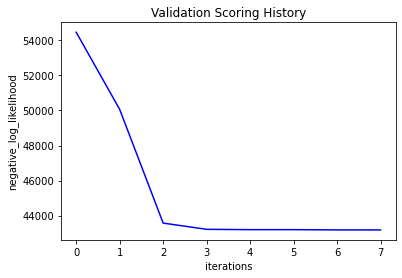

In [15]:
glm.plot(metric='negative_log_likelihood')

We can see from the plot above that after four iterations, the score no longer improves; therefore, if we needed to set a number of iterations as a future parameter, we can choose 4, as the scores don't really improve after that point. We can also use the default number of iterations and use early stopping; that way, the model will stop training when it is no longer improving. We will use early stopping when we start tuning our models.

We can also generate a variable importance plot to see how each of our features contribute to the linear model.

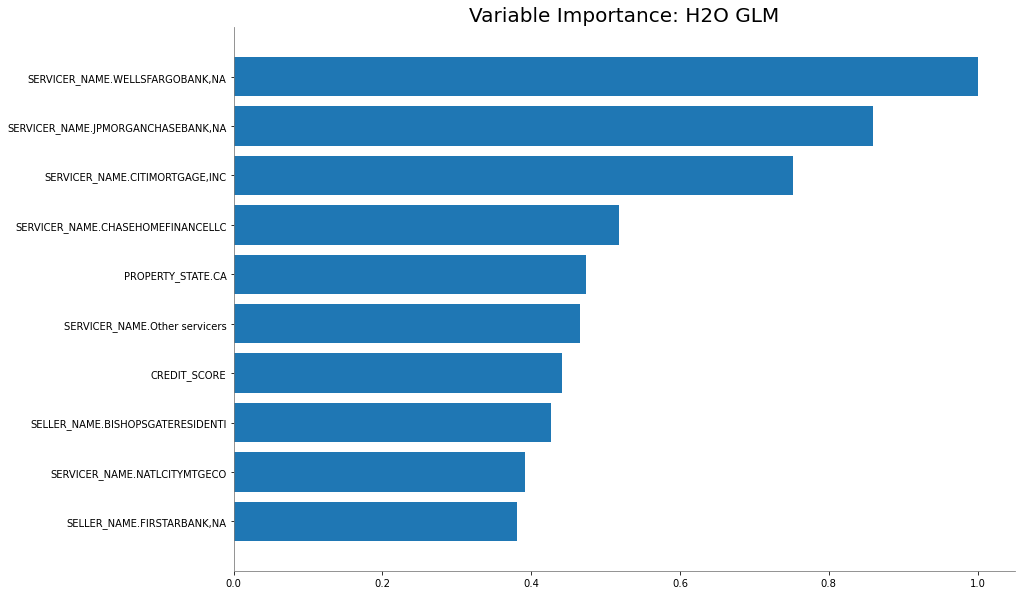

In [16]:
glm.varimp_plot()

From the variable importance plot, we can see that the most significant feature is SERVICER_NAME. In the most important feature, we have different banks or "servicers," and in our linear model, each one makes a difference; for that reason, we see that the first four variables in the plot above are 4 of the servicers in the dataset. These services are the most influential to our model in making predictions of whether someone will default or not. Please keep in mind that it does not necessarily mean that if someone gets a loan from Wells Fargo, they have a high probability of default.

We will take a look at the first ten predictions of our model with the following command:

In [17]:
glm.predict(valid).head(10)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.994227,0.00577262
FALSE,0.997196,0.00280374
FALSE,0.964314,0.0356865
FALSE,0.996098,0.0039019
FALSE,0.996148,0.00385171
TRUE,0.646653,0.353347
FALSE,0.994166,0.00583412
FALSE,0.995727,0.00427344
FALSE,0.958063,0.0419368
FALSE,0.994599,0.005401


The model used by H2O for this classification problem is a Logistic Regression model, and the predictions are based on the threshold for each probability[1]. For a binary classifier, H2O predicts the labels based on the maximum F1 threshold. From the report, the threshold for max F1 is 0.1224. So, any time the probability for TRUE is greater than the 0.1224, the predicted label will be TRUE, as is in the case of the sixth prediction. To learn more about predictions, you can visit the Prediction Section from the H2O documentation.

Lastly, save the default performance of the model, as we will use this for comparison purposes later on.

In [18]:
default_glm_perf=glm.model_performance(valid)

In [19]:
print(default_glm_perf.auc())

0.8450464412102321


## Build a Random Forest

We will build a default Distributed Random Forest (DRF) model and see how it performs on our validation set. DRF generates a forest of classification or regression trees, rather than a single classification or regression tree. Each of these trees is a weak learner built on a subset of rows and columns. More trees will reduce the variance. Both classification and regression take the average prediction over all of their trees to make a final prediction, whether predicting for a class or numeric value.

To build and train our Random Forest or RF(as we will be referring to from this point on) model, simply run the following two lines of code:

In [20]:
rf = H2ORandomForestEstimator (seed = 42, model_id='default_rf')
%time rf.train(x = x, y = y, training_frame=train, validation_frame=valid)
                               

/opt/conda/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 648 ms, sys: 54.5 ms, total: 703 ms
Wall time: 1min 7s


Note that we defined the random seed and the model id. You do not need to do this; the model can be built without defining these parameters. The reason for choosing the random seed is for reproducibility purposes, and the model id is to recognize the model in Flow easily.

Again, print the summary of your model as we did with the GLM model. You will see the summary of the model with the default settings, and the metrics score on the training and validation data.

Below you will see some of the details from the model we just built.

The AUC and F1 Score reported on the training data are 0.8033 and 0.2620, respectively, and you can see them in the image below.

In [21]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  default_rf


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7598180.0,20.0,20.0,20.0,9881.0,11724.0,10834.34




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03217049865504154
RMSE: 0.1793613633284536
LogLoss: 0.18808040483623167
Mean Per-Class Error: 0.26910942081145595
AUC: 0.8034365546707388
AUCPR: 0.19880274803695155
Gini: 0.6068731093414776

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1714152473716729: 


,,FALSE,TRUE,Error,Rate
0,FALSE,322404.0,15203.0,0.045,(15203.0/337607.0)
1,TRUE,8458.0,4203.0,0.668,(8458.0/12661.0)
2,Total,330862.0,19406.0,0.0676,(23661.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.171415,0.262139,194.0
1,max f2,0.088095,0.345659,266.0
2,max f0point5,0.291459,0.272684,125.0
3,max accuracy,0.570928,0.964273,43.0
4,max precision,0.998148,1.000000,0.0
5,max recall,0.000007,1.000000,399.0
6,max specificity,0.998148,1.000000,0.0
7,max absolute_mcc,0.151393,0.234703,209.0
8,max min_per_class_accuracy,0.037451,0.727541,330.0
9,max mean_per_class_accuracy,0.013768,0.730891,360.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.355807,10.811744,10.811744,0.390808,0.468185,0.390808,0.468185,0.108127,0.108127,981.174427,981.174427
1,,2,0.020002,0.276656,6.547068,8.679406,0.236654,0.311273,0.313731,0.389729,0.065477,0.173604,554.706793,767.940610
2,,3,0.030003,0.232143,5.172894,7.510569,0.186983,0.252600,0.271482,0.344019,0.051734,0.225338,417.289444,651.056888
3,,4,0.040001,0.202677,4.408091,6.735115,0.159338,0.217047,0.243452,0.312283,0.044072,0.269410,340.809059,573.511538
4,,5,0.050002,0.180995,4.011955,6.190452,0.145019,0.191749,0.223764,0.288175,0.040123,0.309533,301.195477,519.045216
5,,6,0.100218,0.117647,2.944402,4.563960,0.106430,0.144611,0.164972,0.216240,0.147856,0.457389,194.440231,356.395953
6,,7,0.150002,0.081530,2.086227,3.741617,0.075410,0.098156,0.135247,0.177049,0.103862,0.561251,108.622686,274.161694
7,,8,0.202559,0.062500,1.498295,3.159555,0.054158,0.070321,0.114207,0.149357,0.078746,0.639997,49.829529,215.955480
8,,9,0.300002,0.030525,1.059398,2.477410,0.038294,0.049436,0.089550,0.116902,0.103230,0.743227,5.939771,147.740996
9,,10,0.399999,0.008321,0.906742,2.084751,0.032776,0.016276,0.075357,0.091746,0.090672,0.833899,-9.325786,108.475142




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.03071157490750522
RMSE: 0.17524718230974562
LogLoss: 0.13267563440956423
Mean Per-Class Error: 0.24861547353029934
AUC: 0.826378639356413
AUCPR: 0.2236693606654231
Gini: 0.652757278712826

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1855035085498162: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70080.0,2233.0,0.0309,(2233.0/72313.0)
1,TRUE,1851.0,807.0,0.6964,(1851.0/2658.0)
2,Total,71931.0,3040.0,0.0545,(4084.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.185504,0.283257,164.0
1,max f2,0.092517,0.365133,245.0
2,max f0point5,0.288050,0.307828,107.0
3,max accuracy,0.507947,0.965133,43.0
4,max precision,0.996667,1.000000,0.0
5,max recall,0.000013,1.000000,399.0
6,max specificity,0.996667,1.000000,0.0
7,max absolute_mcc,0.185504,0.255698,164.0
8,max min_per_class_accuracy,0.041619,0.747931,312.0
9,max mean_per_class_accuracy,0.043816,0.751385,308.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.325072,12.372942,12.372942,0.438667,0.439038,0.438667,0.439038,0.123777,0.123777,1137.294156,1137.294156
1,,2,0.020008,0.248567,7.070252,9.721597,0.250667,0.282077,0.344667,0.360557,0.070730,0.194507,607.025232,872.159694
2,,3,0.030012,0.210902,5.716374,8.386523,0.202667,0.228056,0.297333,0.316390,0.057186,0.251693,471.637422,738.652270
3,,4,0.040002,0.185958,4.933190,7.524053,0.174900,0.197849,0.266756,0.286785,0.049285,0.300978,393.318958,652.405304
4,,5,0.050006,0.166226,3.723165,6.763673,0.132000,0.175703,0.239797,0.264562,0.037246,0.338224,272.316479,576.367262
5,,6,0.100012,0.107784,3.069609,4.916641,0.108829,0.133063,0.174313,0.198813,0.153499,0.491723,206.960893,391.664078
6,,7,0.150005,0.077850,2.016850,3.950216,0.071505,0.091579,0.140050,0.163074,0.100828,0.592551,101.684972,295.021566
7,,8,0.200011,0.059189,1.497187,3.336918,0.053081,0.066814,0.118306,0.139008,0.074868,0.667419,49.718671,233.691752
8,,9,0.300009,0.033730,1.087298,2.587078,0.038549,0.044971,0.091722,0.107663,0.108728,0.776147,8.729817,158.707775
9,,10,0.400008,0.021259,0.714833,2.119032,0.025343,0.025871,0.075128,0.087216,0.071482,0.847630,-28.516729,111.903210




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-27 21:13:38,0.099 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-27 21:13:41,3.134 sec,1.0,0.238486,1.772648,0.579630,0.068566,4.199508,0.074234,0.235348,1.725575,0.585285,0.071755,4.582604,0.070080
2,,2020-06-27 21:13:50,12.298 sec,7.0,0.207189,0.867876,0.645735,0.097043,6.483888,0.095799,0.184272,0.355434,0.741514,0.158701,9.234414,0.074255
3,,2020-06-27 21:14:06,28.117 sec,20.0,0.186162,0.367441,0.742657,0.153089,9.113771,0.068297,0.177654,0.177910,0.802288,0.200073,11.399995,0.059570
4,,2020-06-27 21:14:27,49.576 sec,39.0,0.180613,0.221133,0.790126,0.188393,10.519535,0.067226,0.175795,0.140814,0.819720,0.217811,12.034472,0.063064
5,,2020-06-27 21:14:41,1 min 3.557 sec,50.0,0.179361,0.188080,0.803437,0.198803,10.811744,0.067551,0.175247,0.132676,0.826379,0.223669,12.372942,0.054474



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PROPERTY_STATE,42236.546875,1.000000,0.134475
1,CREDIT_SCORE,38299.613281,0.906788,0.121940
2,SELLER_NAME,31417.185547,0.743839,0.100028
3,SERVICER_NAME,25920.623047,0.613701,0.082527
4,ORIGINAL_DEBT_TO_INCOME_RATIO,23534.988281,0.557219,0.074932
5,ORIGINAL_UPB,23414.837891,0.554374,0.074549
6,METROPOLITAN_STATISTICAL_AREA,20642.494141,0.488735,0.065723
7,ORIGINAL_INTEREST_RATE,20437.968750,0.483893,0.065071
8,ORIGINAL_LOAN_TO_VALUE,13487.042969,0.319322,0.042941
9,POSTAL_CODE,12512.929688,0.296258,0.039839



See the whole table with table.as_data_frame()


In this case, we see that the RF model is far from overfitting because the training error is still lower than the validation error, and that means that we can probably do some tuning to improve our model.

We can also generate the variable importance plot:



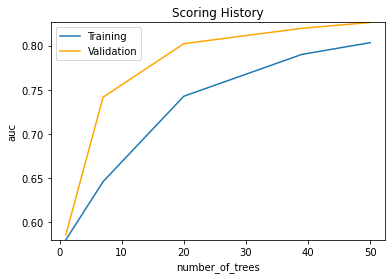

In [22]:
rf.plot(metric='auc')

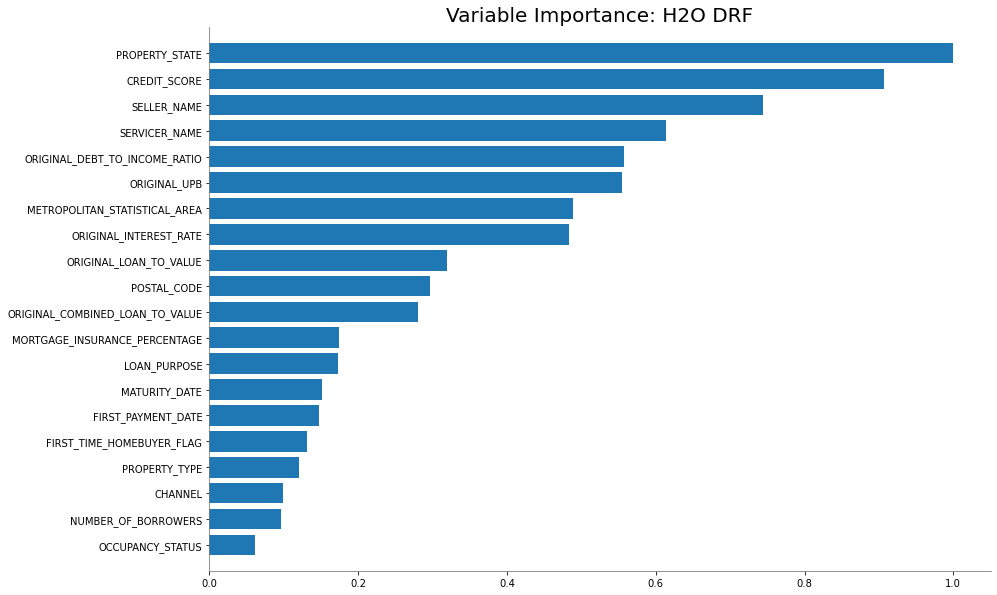

In [23]:
rf.varimp_plot(20)

It is interesting to see that for our RF model, PROPERTY_STATE Is the most important variable, implying that the prediction of whether a loan could be delinquent or not depends on the state where someone is trying to buy that property. The second most important is a more intuitive one, which is the CREDIT_SCORE, as one could expect someone with really good credit to pay their loans fully.

If you want to check the options of what you can print from your model, just type the name of your model along with a dot (.) and press tab. You should see a drop-down menu like the one shown in the image below.

In [24]:
rf.accuracy()

[[0.5709275782581964, 0.9642730709057065]]

- The first parameter shown in the list above is the threshold, and the second value is the accuracy.

In [25]:
rf.F1()

[[0.1714152473716729, 0.2621386472074095]]

- You will see the output in a list format. First, you will see the threshold, and then the actual value, the same as in the accuracy. You could also specify the threshold inside the parenthesis, that way you use the threshold that you want.

Let's take a look at the first ten predictions in our validation set, and compare it to our first model.

In [26]:
rf.predict(valid)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.89606,0.10394
FALSE,0.989924,0.0100759
FALSE,0.99179,0.00820961
FALSE,0.994186,0.005814
FALSE,0.999108,0.00089201
TRUE,0.726028,0.273972
FALSE,0.999971,2.88916e-05
FALSE,0.999835,0.000164608
FALSE,0.847452,0.152548
FALSE,1,0


Both models, GLM and RF, made the same predictions in the first ten predictions. For e.g., the TRUE prediction for the sixth row is the same; there is a different probability, but the prediction is the same.

Again, save the model performance on the validation data

### save the model:

In [27]:
rf_default_per = rf.model_performance(valid)

## Build Gradient Boosting Machine

Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. H2O's GBM sequentially builds classification trees on all the features of the dataset in a fully distributed way - each tree is built in parallel. H2O's GBM fits consecutive trees where each solves for the net loss of the prior trees.
Sometimes GBMs tend to be the best possible models because they are robust and directly optimize the cost function. On the other hand, they tend to overfit, so you need to find the proper stopping point; they are sensitive to noise, and they have several hyper-parameters.

Defining a GBM model is as simple as the other models we have been working with.

In [28]:
gbm = H2OGradientBoostingEstimator(seed = 42, model_id='default_gbm')
%time gbm.train(x = x, y = y, training_frame=train, validation_frame=valid)

/opt/conda/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 496 ms, sys: 45.5 ms, total: 541 ms
Wall time: 40.8 s


In [29]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  default_gbm


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,28336.0,5.0,5.0,5.0,25.0,32.0,30.96




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.029506421363469686
RMSE: 0.17177433266780484
LogLoss: 0.11505127038888421
Mean Per-Class Error: 0.20226265196401738
AUC: 0.8781516490712882
AUCPR: 0.29501524692178666
Gini: 0.7563032981425764

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15429695309862027: 


,,FALSE,TRUE,Error,Rate
0,FALSE,326552.0,11055.0,0.0327,(11055.0/337607.0)
1,TRUE,7745.0,4916.0,0.6117,(7745.0/12661.0)
2,Total,334297.0,15971.0,0.0537,(18800.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.154297,0.343392,194.0
1,max f2,0.071922,0.428489,265.0
2,max f0point5,0.269743,0.364851,133.0
3,max accuracy,0.451590,0.965027,71.0
4,max precision,0.896728,1.000000,0.0
5,max recall,0.003220,1.000000,398.0
6,max specificity,0.896728,1.000000,0.0
7,max absolute_mcc,0.141960,0.318392,203.0
8,max min_per_class_accuracy,0.039489,0.796986,309.0
9,max mean_per_class_accuracy,0.037540,0.797737,312.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.345972,14.286666,14.286666,0.516415,0.479898,0.516415,0.479898,0.142880,0.142880,1328.666572,1328.666572
1,,2,0.020002,0.247640,9.011103,11.648884,0.325721,0.290490,0.421068,0.385194,0.090119,0.232999,801.110315,1064.888444
2,,3,0.030003,0.197997,7.139384,10.145718,0.258065,0.220582,0.366733,0.330323,0.071400,0.304399,613.938409,914.571765
3,,4,0.040001,0.166786,5.482464,8.980154,0.198172,0.181255,0.324602,0.293064,0.054814,0.359213,448.246392,798.015384
4,,5,0.050002,0.144748,4.880685,8.160213,0.176420,0.155075,0.294964,0.265465,0.048811,0.408025,388.068514,716.021329
5,,6,0.100001,0.085874,3.405812,5.783080,0.123109,0.110567,0.209039,0.188018,0.170287,0.578311,240.581193,478.308048
6,,7,0.150002,0.059880,2.250930,4.605675,0.081363,0.071572,0.166480,0.149202,0.112550,0.690862,125.092991,360.567455
7,,8,0.200001,0.044609,1.525981,3.835773,0.055159,0.051662,0.138650,0.124817,0.076297,0.767159,52.598067,283.577306
8,,9,0.300002,0.027793,0.992017,2.887854,0.035858,0.035153,0.104386,0.094929,0.099202,0.866361,-0.798292,188.785440
9,,10,0.399999,0.019080,0.537884,2.300375,0.019443,0.023012,0.083151,0.076950,0.053787,0.920148,-46.211551,130.037450




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.03014535673578486
RMSE: 0.1736241824625385
LogLoss: 0.11952062413571657
Mean Per-Class Error: 0.22386818861825042
AUC: 0.8541002080486222
AUCPR: 0.23773886113273363
Gini: 0.7082004160972444

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16566772863569384: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70192.0,2121.0,0.0293,(2121.0/72313.0)
1,TRUE,1817.0,841.0,0.6836,(1817.0/2658.0)
2,Total,72009.0,2962.0,0.0525,(3938.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.165668,0.299288,177.0
1,max f2,0.070046,0.392894,261.0
2,max f0point5,0.257240,0.321033,127.0
3,max accuracy,0.592026,0.964946,30.0
4,max precision,0.895425,1.000000,0.0
5,max recall,0.003543,1.000000,397.0
6,max specificity,0.895425,1.000000,0.0
7,max absolute_mcc,0.100112,0.280014,230.0
8,max min_per_class_accuracy,0.035786,0.773514,311.0
9,max mean_per_class_accuracy,0.031330,0.776132,319.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.344236,13.012273,13.012273,0.461333,0.473428,0.461333,0.473428,0.130173,0.130173,1201.227289,1201.227289
1,,2,0.020008,0.243068,7.784799,10.398536,0.276000,0.287629,0.368667,0.380528,0.077878,0.208051,678.479910,939.853599
2,,3,0.030012,0.195026,6.054844,8.950639,0.214667,0.217315,0.317333,0.326124,0.060572,0.268623,505.484374,795.063858
3,,4,0.040002,0.163482,4.933190,7.947281,0.174900,0.178416,0.281761,0.289234,0.049285,0.317908,393.318958,694.728102
4,,5,0.050006,0.141967,3.723165,7.102232,0.132000,0.152511,0.251800,0.261882,0.037246,0.355154,272.316479,610.223243
5,,6,0.100012,0.085865,3.468357,5.285295,0.122966,0.109552,0.187383,0.185717,0.173439,0.528593,246.835715,428.529479
6,,7,0.150005,0.060279,2.197463,4.256201,0.077908,0.071692,0.150898,0.147716,0.109857,0.638450,119.746313,325.620062
7,,8,0.200011,0.044445,1.617564,3.596497,0.057349,0.051758,0.127509,0.123725,0.080888,0.719338,61.756353,259.649735
8,,9,0.300009,0.027777,1.068487,2.753865,0.037882,0.035185,0.097635,0.094213,0.106847,0.826185,6.848679,175.386463
9,,10,0.400008,0.019122,0.639587,2.225313,0.022676,0.023018,0.078896,0.076415,0.063958,0.890143,-36.041284,122.531289




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-27 21:14:52,0.046 sec,0.0,0.186655,0.155498,0.500000,0.036147,1.000000,0.963853,0.184925,0.153223,0.500000,0.035454,1.000000,0.964546
1,,2020-06-27 21:14:54,2.402 sec,1.0,0.184765,0.147793,0.813317,0.179129,8.555719,0.075742,0.183099,0.145890,0.802085,0.169243,8.720747,0.056662
2,,2020-06-27 21:14:56,3.600 sec,2.0,0.183459,0.143542,0.826473,0.187720,8.791581,0.075742,0.181892,0.142011,0.812856,0.173714,8.818929,0.071134
3,,2020-06-27 21:15:00,7.888 sec,8.0,0.178666,0.130545,0.848040,0.223464,11.535026,0.062738,0.177618,0.130322,0.833531,0.203900,10.943848,0.074242
4,,2020-06-27 21:15:08,15.984 sec,16.0,0.175893,0.123865,0.857773,0.243940,12.501820,0.059851,0.175489,0.124846,0.840628,0.216801,11.846433,0.060650
5,,2020-06-27 21:15:15,22.977 sec,27.0,0.174047,0.119457,0.867153,0.263628,13.133624,0.062355,0.174506,0.121813,0.847427,0.226077,12.072080,0.060330
6,,2020-06-27 21:15:24,31.708 sec,41.0,0.172508,0.116393,0.875027,0.284508,13.718042,0.052280,0.173864,0.120108,0.852743,0.234470,12.636196,0.055688
7,,2020-06-27 21:15:31,39.396 sec,50.0,0.171774,0.115051,0.878152,0.295015,14.286666,0.053673,0.173624,0.119521,0.854100,0.237739,13.012273,0.052527



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,CREDIT_SCORE,2309.658691,1.000000,0.294923
1,SERVICER_NAME,1683.956299,0.729093,0.215026
2,PROPERTY_STATE,1255.222290,0.543467,0.160281
3,SELLER_NAME,997.285217,0.431789,0.127345
4,NUMBER_OF_BORROWERS,316.293396,0.136944,0.040388
5,ORIGINAL_INTEREST_RATE,300.391693,0.130059,0.038357
6,ORIGINAL_UPB,292.308807,0.126559,0.037325
7,MORTGAGE_INSURANCE_PERCENTAGE,186.016342,0.080538,0.023753
8,ORIGINAL_LOAN_TO_VALUE,158.307068,0.068541,0.020214
9,PROPERTY_TYPE,64.317169,0.027847,0.008213



See the whole table with table.as_data_frame()


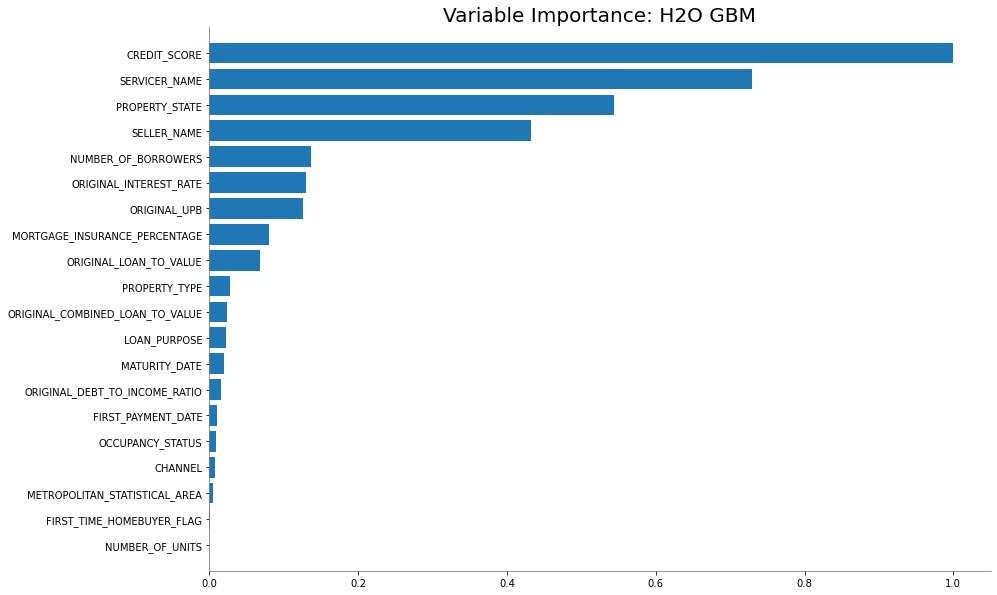

In [30]:
gbm.varimp_plot(20)

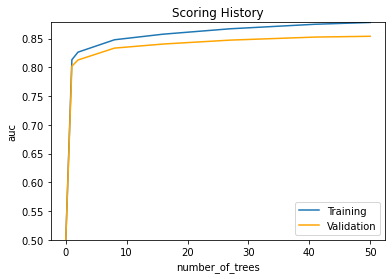

In [31]:
gbm.plot(metric='auc')

The default GBM model had a slightly better performance than the default RF.
We will make the predictions with the GBM model as well.

In [32]:
gbm.predict(valid)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.978372,0.0216281
FALSE,0.995024,0.00497636
FALSE,0.964645,0.0353549
FALSE,0.99305,0.00694996
FALSE,0.99217,0.0078297
TRUE,0.591272,0.408728
FALSE,0.993899,0.00610064
FALSE,0.995599,0.00440117
FALSE,0.950489,0.0495107
FALSE,0.992925,0.00707464


All three models made the same ten predictions, and this gives us an indication of why all three scores are close to each other. Although the sixth prediction is TRUE for all three models, the probability is not exactly the same, but since the thresholds for all three models were low, the predictions were still TRUE.
As we did with the other two models, save the model performance.

In [33]:
default_gbm_per = gbm.model_performance(valid)

# Model tuning
### Tune GLM with H2O GridSearch

H2O supports two types of grid search – traditional (or "cartesian") grid search and random grid search. In a cartesian grid search, you specify a set of values for each hyperparameter that you want to search over, and H2O will train a model for every combination of the hyperparameter values. This means that if you have three hyperparameters and you specify 5, 10, and 2 values for each, your grid will contain a total of 5*10*2 = 100 models.

In a random grid search, you specify the hyperparameter space in the exact same way, except H2O will sample uniformly from the set of all possible hyperparameter value combinations. In the random grid search, you also specify a stopping criterion, which controls when the random grid search is completed. You can tell the random grid search to stop by specifying a maximum number of models or the maximum number of seconds allowed for the search. You can also specify a performance-metric-based stopping criterion, which will stop the random grid search when the performance stops improving by a specified amount.
Once the grid search is complete, you can query the grid object and sort the models by a particular performance metric (for example, "AUC"). All models are stored in the H2O cluster and are accessible by model id.

To save some time, we will do a random grid search for our GLM model instead of the cartesian search. The H2OGridSearch has 4 parameters, and in order to use it, you need at least three of them. The first parameter for the grid search is the model that you want to tune. Next are your hyperparameters, which needs to be a string of parameters, and a list of values to be explored by grid search. The third one is optional, which is the grid id, and if you do not specify one, an id will automatically be generated. Lastly, the fourth parameter is the search criteria, where you can specify if you want to do a cartesian or random search.

We will explore two ways of defining your grid search, and you can use the way you prefer. One way is to define all at once in the grid search (as we will do it for the GLM). The second way is to define every parameter separately. For example, define your model, your hyper-parameters, and your search criteria, and just add that to your grid search once you are ready.

For our GLM, we will tune alpha,lambda, and missing_values_handling. The other parameters that you could change, such as solver,max_active_predictors, and nlambdas, to mention a few, are not supported by H2OGridSearch.

1. alpha is the distribution of regularization between the L1 (Lasso) and L2 (Ridge) penalties. A value of 1 for alpha represents Lasso regression, a value of 0 produces Ridge regression, and anything in between specifies the amount of mixing between the two.

2. lambda, on the other hand, is the regularization strength. For alpha, we can explore the range from 0 to 1 in steps of 0.01. For lambda, you could start just doing your own random searches, but that might take a lot of time. Instead, we can base our value for lambda on the original value of lambda, which was 6.626e-5. We can choose our starting point to be 1e-6 and go from there.

3. missing_values_handling This parameter allows us to specify how we want to specify any missing data (Options are skip and MeanImputation)

In [34]:
glm_grid = h2o.grid.H2OGridSearch (
    H2OGeneralizedLinearEstimator(family= 'binomial', lambda_search = True),

    hyper_params = {
        'alpha': [x*0.01 for x in range(0, 100)],
        'lambda': [x*1e-8 for x in range(0, 1000)],
        'missing_values_handling': ['Skip', 'MeanImputation']
    },

    grid_id = 'glm_random_grid',

    search_criteria = {
        'strategy': 'RandomDiscrete',
        'max_models': 200,
        'max_runtime_secs': 300,
        'seed': 42}
)

%time glm_grid.train(x = x, y = y, training_frame=train, validation_frame=valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 5.69 s, sys: 256 ms, total: 5.95 s
Wall time: 5min 9s


You can easily see all four parameters of our grid search in the code sample above. We defined our GLM model the same way we did before. Then, we take care of the hyper-parameters and notice that we have used a for loop for the ranges of both alpha and lambda in order to cover more possible values. Because the number of possible models in our search criteria is very, we specify that we want a maximum number of 200 models, or that the grid search runs for only 300 seconds.

Print the models in descending order, sorted by the AUC. By default, the grid search will return the best models based on the logloss. Therefore, in order to get the best model based on the AUC, we will specify that we want to sort the models by AUC. You can change this to other metrics, depending on what you are looking for.

In [35]:
sorted_glm_grid = glm_grid.get_grid(sort_by='auc', decreasing=True)
sorted_glm_grid.sorted_metric_table()

,,alpha,lambda,missing_values_handling,model_ids,auc
0,,[0.03],[6.29E-6],Skip,glm_random_grid_model_5,0.8534243904294566
1,,[0.56],[6.68E-6],Skip,glm_random_grid_model_33,0.8533819787402868
2,,[0.6900000000000001],[2.18E-6],Skip,glm_random_grid_model_64,0.8533804711127351
3,,[0.09],[3.45E-6],Skip,glm_random_grid_model_42,0.8533803793020828
4,,[0.32],[5.67E-6],Skip,glm_random_grid_model_35,0.8533737157815902
...,...,...,...,...,...,...
73,,[0.88],[7.32E-6],MeanImputation,glm_random_grid_model_46,0.8459654874636457
74,,[0.17],[7.0E-8],MeanImputation,glm_random_grid_model_9,0.8459653886123777
75,,[0.9],[4.800000000000001E-7],MeanImputation,glm_random_grid_model_15,0.845953019197114
76,,[0.6],[4.67E-6],MeanImputation,glm_random_grid_model_60,0.8459445960285286


With the code sample above, you will get the models that were created with their respective parameters, model id, and AUC. As you can see, the grid search did not take that long to complete, and it trained a total of 200 models, which was our second constraint. The AUC did improve, and we will compare it to the AUC from our default model.

### Save the best model and print the model summary

In [36]:
tuned_glm = glm_grid.models[0]
tuned_glm.summary()


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.09, lambda = 3.45E-6 )","nlambda = 100, lambda.max = 0.3691, lambda.min = 3.45E-6, lambda.1...",161,160,5,py_4_sid_b930


## Make a comparison between the performance of default glm model and the best model from grid search.
- First, evaluate the model performane on the validation set:

In [37]:
tuned_glm_perf = tuned_glm.model_performance(valid)

### print the AUC for default and the tuned model:

In [38]:
print('Default GLM AUC: %.4f \nTuned GLM AUC: %.4f' % (default_glm_perf.auc(), tuned_glm_perf.auc()))

Default GLM AUC: 0.8450 
Tuned GLM AUC: 0.8534


### Print F1 score to see if it improved or not:

In [39]:
print('Default GLM F1 Score', default_glm_perf.F1())
print('Tuned FLm F1 Score', tuned_glm_perf.F1())

Default GLM F1 Score [[0.12627867037192236, 0.28374578177727783]]
Tuned FLm F1 Score [[0.12549339190401904, 0.28352059925093637]]


- The max F1 Score did not have a significant improvement. Although the threshold slightly increased, it did not improve the overall F1 Score by much. Let's take a look at the confusion matrix to see if the values changed.

In [40]:
print('Default GLM: ', default_glm_perf.confusion_matrix())
print('Tuned GLM: ', tuned_glm_perf.confusion_matrix())

Default GLM:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12627867037192236: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68868.0,3445.0,0.0476,(3445.0/72313.0)
1,TRUE,1649.0,1009.0,0.6204,(1649.0/2658.0)
2,Total,70517.0,4454.0,0.0679,(5094.0/74971.0)



Tuned GLM:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12549339190401904: 


,,FALSE,TRUE,Error,Rate
0,FALSE,51014.0,2655.0,0.0495,(2655.0/53669.0)
1,TRUE,1171.0,757.0,0.6074,(1171.0/1928.0)
2,Total,52185.0,3412.0,0.0688,(3826.0/55597.0)


Notice how the overall error slightly decreased, as well as the error for the FALSE class. While the error for the TRUE class had minimal improvement, meaning the model is classifying a few more samples that are actually TRUE correctly. We see that our model has a hard time classifying the TRUE labels, and this is due to the highly imbalanced dataset that we are working on.

We will do the test evaluation after we tune our other two models.

### Tune the RF model with H2O GridSearch

- We will do the grid search a bit differently this time. We are going to define each parameter of the grid search separately, and then pass the variables to the grid search function.

- We will first find one of the most important parameters for an RF, which is the maximum depth.

- max_depth defines the number of nodes along the longest path from the start of the tree to the farthest leaf node. Higher values will make the model more complex and can lead to overfitting. Setting this value to 0 specifies no limit. This value defaults to 20. We will first look for the best value for the max_depth; this would save us some computational time when we tune the other parameters. As we mentioned before, we will use a slightly different approach for the grid search. We are going to instantiate each parameter for the grid search, and then pass each one into it.

In [41]:
hyper_parameters = {'max_depth': [1,3,5,6,7,8,9,10,12,13,15,20,25,35]}

rf = H2ORandomForestEstimator(
        seed= 42,
        stopping_rounds = 5,
        stopping_tolerance = 1e-4,
        stopping_metric = 'auc',
        model_id= 'rf')

grid_id = 'depth_grid'

search_criteria = {'strategy': "Cartesian"}

#Grid Search

rf_grid = H2OGridSearch(model = rf,
                       hyper_params = hyper_parameters,
                       grid_id = grid_id,
                       search_criteria = search_criteria)

%time rf_grid.train(x=x, y=y, training_frame=train, validation_frame=valid)

drf Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 7min 58s, sys: 1min 6s, total: 9min 4s
Wall time: 13min 35s


We are doing a random search of values for max_depth to see if the default value is good, or if we need to adjust the value. After it is done training, print the models sorted by AUC

In [42]:
sorted_rf_depth = rf_grid.get_grid(sort_by='auc',decreasing=True)
sorted_rf_depth.sorted_metric_table()

,,max_depth,model_ids,auc
0,,10,depth_grid_model_8,0.8483202339274679
1,,12,depth_grid_model_9,0.8475205427762891
2,,9,depth_grid_model_7,0.8472289965689974
3,,13,depth_grid_model_10,0.8469513389648796
4,,8,depth_grid_model_6,0.8452958845813425
5,,15,depth_grid_model_11,0.8430497704585108
6,,7,depth_grid_model_5,0.842491713428259
7,,6,depth_grid_model_4,0.8368467831461335
8,,5,depth_grid_model_3,0.8311638705648987
9,,20,depth_grid_model_12,0.826378639356413


#### Now that we have the proper depth for our RF, we will do a random grid search to try to find the next four parameters, categorical_encoding,histogram_type,mtries, and nbins.

In [43]:
hyper_parameters = {'categorical_encoding': ['auto','enum',
                                             'one_hot_explicit', 'binary',
                                             'label_encoder', 'sort_by_response',
                                             'enum_limited'],
                   'histogram_type': ['uniform_adaptive', 'random',
                                      'quantiles_global', 'round_robin'],
                   'nbins': [10,12,15,18,20,25,30,40,50] #Default = 20
                   }

rf = H2ORandomForestEstimator(max_depth = 10,
                             ntrees = 50,
                             seed = 42,
                             stopping_rounds = 5,
                             stopping_tolerance = 1e-5,
                             stopping_metric = 'auc',
                              model_id = 'rf'
                             )

grid_id =  'rf_random_grid_'

search_criteria = {'strategy': 'RandomDiscrete',
                  'max_models': 100,
                  'max_runtime_secs': 900,
                  'seed': 42
                  }

rf_grid = H2OGridSearch(model = rf,
                       hyper_params = hyper_parameters,
                       grid_id = grid_id,
                       search_criteria = search_criteria)

%time rf_grid.train(x=x, y=y, training_frame = train, validation_frame = valid)
    


drf Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 4.55 s, sys: 223 ms, total: 4.77 s
Wall time: 15min 3s


In [44]:
sorted_rf = rf_grid.get_grid(sort_by='auc', decreasing=True)
sorted_rf.sorted_metric_table()

,,categorical_encoding,histogram_type,nbins,model_ids,auc
0,,SortByResponse,RoundRobin,20,rf_random_grid__model_13,0.8488894949685589
1,,SortByResponse,QuantilesGlobal,40,rf_random_grid__model_12,0.8488213734380629
2,,AUTO,RoundRobin,12,rf_random_grid__model_5,0.848509162113031
3,,Enum,RoundRobin,10,rf_random_grid__model_1,0.8476035518280373
4,,SortByResponse,RoundRobin,40,rf_random_grid__model_20,0.8475552109565664
5,,EnumLimited,UniformAdaptive,15,rf_random_grid__model_8,0.84196855609836
6,,OneHotExplicit,Random,15,rf_random_grid__model_17,0.841501580106305
7,,EnumLimited,RoundRobin,15,rf_random_grid__model_2,0.8410884416364995
8,,OneHotExplicit,UniformAdaptive,18,rf_random_grid__model_7,0.8402644434787543
9,,EnumLimited,QuantilesGlobal,25,rf_random_grid__model_3,0.8402269658413825


- The AUC improved using max_depth=10 and doing a random grid search for the parameters mentioned above.

- Another important parameter that we can tune is the number of trees (ntrees).

- ntrees specifies the number of trees that you want your RF to have. When tuning the number of trees, you need to be careful because when you have too many trees, your model will tend to overfit. That's why it's always advised to use cross-validation, and never tune models based on training scores. Again, you can also use early stopping; that way, your model stops training once the validation score is no longer improving.

- We won't do a grid search for a maximum number of trees. We are going to update the parameters of our model with the values we found in the previous two grid searches that we did. We will use 500 trees while using early stopping; that way, if the model doesn't improve, it will automatically stop.

In [45]:
tuned_rf = H2ORandomForestEstimator (max_depth = 10,
                                    seed = 42,
                                    model_id = 'tuned_rf',
                                    categorical_encoding = 'auto',
                                    histogram_type ='quantiles_global',
                                    mtries = 4,
                                    nbins = 10,
                                    ntrees = 500,
                                     
                                    stopping_rounds = 3,
                                    stopping_tolerance = 1e-5,
                                    stopping_metric = 'auc'
                                    )
%time tuned_rf.train(x=x, y=y, training_frame=train, validation_frame=valid)

/opt/conda/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 1.8 s, sys: 134 ms, total: 1.93 s
Wall time: 6min 21s


- lets take a look if the model is not overfitting:

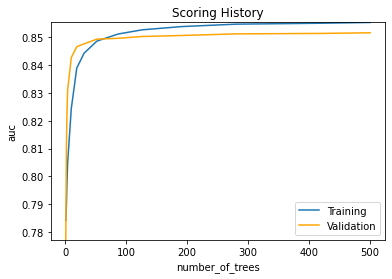

In [46]:
tuned_rf.plot(metric='auc')

#### By looking at the plot above, we can see that if we were to use less than 500 trees, we would get a similar score. Even if you use more than 500 trees, the training AUC might keep increasing, but the validation AUC will remain the same. For that reason, one way to find a good number of trees is just to build a model with a large number of trees, and from the scoring plot, identify a good cut-off or just use more aggressive early stopping settings. Please keep in mind that you need to be doing cross-validation.

#### From the scoring history plot, we can see that the Validation AUC starts plateauing around 200 trees, but keeps slightly increasing. H2O models are, by default, optimized to give a good performance; therefore, sometimes, there is not much tuning to be done. We will see that with the GBM model as well.

- Print validation AUC

In [47]:
tuned_rf_per = tuned_rf.model_performance(valid)
tuned_rf_per.auc()

0.8516867179180316

- F1 Score:

In [48]:
tuned_rf_per.F1()

[[0.1301545067565406, 0.2994997579473939]]

- The AUC from the validation data was 0.8516, and the F1 Score 0.2993.

- Compare the tuned model with the dafault one:

In [49]:
print('Default RF AUC: %.4f \nTuned RF AUC: %.4f' % (rf_default_per.auc(), tuned_rf_per.auc()))

Default RF AUC: 0.8264 
Tuned RF AUC: 0.8517


- The AUC value for our RF model had a decent improvement by changing the max_depth, doing a quick random search for the parameters categorical_encoding,histogram_type,mtries, and nbins. Also by increasing the number of trees. Let's see if the F1 Score improved :

In [50]:
print('Default RF F1 Score:', rf_default_per.F1())
print('Tuned RF F1 Score:', tuned_rf_per.F1())

Default RF F1 Score: [[0.1855035085498162, 0.2832572832572833]]
Tuned RF F1 Score: [[0.1301545067565406, 0.2994997579473939]]


- The F1 score also improved. Although the F1 score is still low, we will look at the confusion matrix, and let's see how this improvement reflects on the confusion matrix

In [51]:
print('Default RF: ', rf_default_per.confusion_matrix())
print('Tuned RF: ', tuned_rf_per.confusion_matrix())

Default RF:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1855035085498162: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70080.0,2233.0,0.0309,(2233.0/72313.0)
1,TRUE,1851.0,807.0,0.6964,(1851.0/2658.0)
2,Total,71931.0,3040.0,0.0545,(4084.0/74971.0)



Tuned RF:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1301545067565406: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69702.0,2611.0,0.0361,(2611.0/72313.0)
1,TRUE,1730.0,928.0,0.6509,(1730.0/2658.0)
2,Total,71432.0,3539.0,0.0579,(4341.0/74971.0)


#### The AUC for our tuned model actually improved, as well as the F1 Score. However, the misclassification error slightly increased. The new model is predicting fewer FALSE labels that are actually FALSE; this means the model is classifying more FALSE labels incorrectly. On the bright side, the model is predicting more TRUE labels correctly, and thus, we have a smaller misclassification error for the TRUE label. It is good to see that the model now predicts more TRUE labels as TRUE because we saw that the default model, as well as the GLM, were also having a hard time making those predictions.

Now, we will see if we can improve our GBM model.

## Tune the GBM model with H2O GridSearch

- We will take a similar approach to the tuning of the RF model. We could do the grid search for a list of a number of trees, but since the scoring history will show us the validation score based on the number of trees, we will obtain that number from the plot. We will be using 50 trees, which is the default. For a GBM model, conceptually speaking, the max_depth and ntrees is the same as the RF model. However, we will see that the values are smaller than the ones used for the RF.

In [52]:
hyper_params = {'max_depth': [3,4,5,6,7,8,9,10,11,12,13,15],
               }

gbm = H2OGradientBoostingEstimator(model_id = 'grid_gbm', ntrees = 50,
                                  seed = 42
                                  )
gbm_grid = H2OGridSearch(gbm, hyper_params,
                        grid_id = 'depth_gbm_grid',
                        search_criteria = {'strategy': "Cartesian"})

%time gbm_grid.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 2.67 s, sys: 114 ms, total: 2.79 s
Wall time: 11min 37s


In [53]:
sorted_gbm_depth = gbm_grid.get_grid(sort_by='auc', decreasing=True)
sorted_gbm_depth.sorted_metric_table()

,,max_depth,model_ids,auc
0,,6,depth_gbm_grid_model_4,0.8545357753508993
1,,5,depth_gbm_grid_model_3,0.8541002080486222
2,,7,depth_gbm_grid_model_5,0.8529009496662141
3,,8,depth_gbm_grid_model_6,0.8512531640600055
4,,4,depth_gbm_grid_model_2,0.8512081321046683
5,,9,depth_gbm_grid_model_7,0.8497842446208027
6,,3,depth_gbm_grid_model_1,0.8476725422091533
7,,10,depth_gbm_grid_model_8,0.8449705260376477
8,,11,depth_gbm_grid_model_9,0.8376480533162535
9,,12,depth_gbm_grid_model_10,0.8346376914245702


Based on the grid search that we just did, the best max_depth is 6.
We will do a random grid search with a few parameters to see if we can get a better model. We will use 50 trees, and after we find some values from the random grid search, we will increase the number of trees.

Note: You don't have to run the following line of code unless you want to see it for yourself. The search criteria will only allow the grid search to run for 15 minutes, if you would like to see the results of running it for longer, just increase the max_runtime_secs to a higher value and wait for the results.

Here is the list of parameters that we are going to try to tune

1. sample_rate: Specify the row sampling rate (x-axis). (Note that this method is sample without replacement.) The range is 0.0 to 1.0, and this value defaults to 1. Higher values may improve training accuracy. Test accuracy improves when either columns or rows are sampled.

2. col_sample_rate: Specify the column sampling rate (y-axis). (Note that this method is sampling without replacement.) The range is 0.0 to 1.0.

3. col_sample_rate_per_tree: Specify the column sample rate per tree. This can be a value from 0.0 to 1.0 and defaults to 1. Note that it is multiplicative with col_sample_rate, so setting both parameters to 0.8, for example, results in 64% of columns being considered at any given node to split.

4. col_sample_rate_change_per_level: This option specifies to change the column sampling rate as a function of the depth in the tree.

5. learn_rate: Specify the learning rate. The range is 0.0 to 1.0.

nbins: Specify the number of bins for the histogram to build, then split at the best point.

6. nbins_cats: Specify the maximum number of bins for the histogram to build, then split at the best point. Higher values can lead to more overfitting.

7. min_split_improvement: The value of this option specifies the minimum relative improvement in squared error reduction in order for a split to happen.

8. histogram_type: Random split points or quantile-based split points can be selected as well. RoundRobin can be specified to cycle through all histogram types (one per tree). Use this option to specify the type of histogram to use for finding optimal split points.

Find more parameters and more information about them at the Documentation - GBM Section and also the Python Module



In [54]:
gbm = H2OGradientBoostingEstimator(
    max_depth = 6,
    ntrees = 50,
    seed = 42,
    model_id = 'grid_gbm'
)

hyper_params_tune = {
    'sample_rate': [x/100. for x in range(20,101)],
    'col_sample_rate': [x/100. for x in range(20,101)],
    'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
    'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
    'learn_rate': [.5, .25, 0.1, 0.07, 0.05, 0.01, 0.001],
    'nbins': [2**x for x in range(4,11)],
    'nbins_cats': [2**x for x in range(4,13)],
    'min_split_improvement': [0,1e-8,1e-6,1e-4],
    'histogram_type': ['UniformAdaptive', 'QuantilesGlobal', 'RoundRobin']}

search_criteria_tune = {'strategy': 'RandomDiscrete',
                       'max_runtime_secs': 1200,
                       'max_models': 100, ##build no more than 100 models
                       'seed': 42 }

random_grid = H2OGridSearch(model=gbm, 
                            hyper_params=hyper_params_tune,
                           grid_id= 'random_grid',
                           search_criteria = search_criteria_tune)

%time random_grid.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 6.89 s, sys: 370 ms, total: 7.26 s
Wall time: 20min 4s


In [55]:
sorted_random_search = random_grid.get_grid(sort_by='auc',decreasing=True)
sorted_random_search.sorted_metric_table()

,,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,histogram_type,learn_rate,min_split_improvement,nbins,nbins_cats,sample_rate,model_ids,auc
0,,0.68,0.92,0.59,UniformAdaptive,0.1,1.0E-6,16,128,0.7,random_grid_model_41,0.8576773258821536
1,,0.91,1.05,0.46,QuantilesGlobal,0.07,1.0E-4,1024,1024,0.63,random_grid_model_17,0.8566483440118197
2,,0.91,0.9,0.68,QuantilesGlobal,0.1,1.0E-4,16,256,0.55,random_grid_model_7,0.855462997644728
3,,0.99,0.96,0.49,RoundRobin,0.05,1.0E-8,64,512,0.82,random_grid_model_20,0.8551429094344347
4,,0.46,0.93,0.75,RoundRobin,0.1,1.0E-4,32,256,0.92,random_grid_model_27,0.854659794672181
5,,0.67,1.07,0.74,RoundRobin,0.05,1.0E-4,32,256,0.57,random_grid_model_18,0.853612114304073
6,,0.28,1.04,0.38,QuantilesGlobal,0.1,0.0,1024,4096,0.58,random_grid_model_22,0.8534286983773836
7,,0.93,0.93,0.41,QuantilesGlobal,0.07,1.0E-4,1024,32,0.58,random_grid_model_45,0.8531069791211657
8,,0.85,0.91,0.74,RoundRobin,0.25,1.0E-4,512,4096,0.95,random_grid_model_13,0.8512727079962571
9,,0.78,0.96,0.98,QuantilesGlobal,0.1,1.0E-4,512,4096,0.54,random_grid_model_10,0.8510067954836041


The random grid search slightly improved the results. Note that since the combination of possible models is so large, we will need to run the grid search for much longer to see if there are models that further improve the AUC. For now, we can leave it at that, or you can try it on your own to see if you get better results! The random search yielded an AUC of 0.8576.

We are going to build another GBM model, but we will update the parameters we found, and we are going to increase ntrees to 200 and see if we can further improve our model.

In [56]:
tuned_gbm = H2OGradientBoostingEstimator(max_depth = 6,
                                        ntrees = 200,
                                        sample_rate = 0.7,
                                        col_sample_rate = 0.68,
                                        col_sample_rate_per_tree = 0.59,
                                        col_sample_rate_change_per_level = 0.92,
                                        learn_rate = 0.1,
                                        nbins = 16,
                                        nbins_cats = 128,
                                        min_split_improvement = 1e-6,
                                        histogram_type = 'UniformAdaptive',
                                         
                                        seed = 42,
                                        model_id = 'tuned_gbm',
                                        stopping_rounds = 3,
                                        stopping_tolerance = 1e-5,
                                        stopping_metric = 'auc'
                                         
                                    )
%time tuned_gbm.train(x=x, y=y, training_frame=train, validation_frame=valid)

/opt/conda/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 568 ms, sys: 51.3 ms, total: 619 ms
Wall time: 1min 10s


Print the AUC and F1 scores to see how the model performed:

In [57]:
tuned_gbm_per = tuned_gbm.model_performance(valid)
print(tuned_gbm_per.auc())
print(tuned_gbm_per.F1())

0.8605749531052185
[[0.18148647270330784, 0.31592084150472455]]


We were able to get the highest validation AUC among the three models with our GBM. The model reached a 0.8606 AUC, while also improving the F1 to 0.3163.

Let's take a look at the confusion matrix and see how are the misclassification errors from this model:

In [58]:
tuned_gbm_per.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18148647270330784: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70248.0,2065.0,0.0286,(2065.0/72313.0)
1,TRUE,1772.0,886.0,0.6667,(1772.0/2658.0)
2,Total,72020.0,2951.0,0.0512,(3837.0/74971.0)


Even though the misclassification error for the TRUE class improved, the error for the FALSE class and the overall error did not improve by much. However, with the tuning that we did, our GBM model was able to make more correct predictions for the TRUE class, which is good since we are dealing with a highly imbalanced dataset.

Here is how you can compare the AUC from the default model with the tuned model:

In [59]:
print('Default GBM AUC: %.4f \nTuned GBM AUC: %.4f' % (default_gbm_per.auc(), tuned_gbm_per.auc()))

Default GBM AUC: 0.8541 
Tuned GBM AUC: 0.8606


# Test Set Performance

We are going to obtain the test performance of each of the best models. Notice that we are just taking the best models and checking the model performance with the test set.

In [60]:
glm_test_per = tuned_glm.model_performance(test)
rf_test_per = tuned_rf.model_performance(test)
gbm_test_per = tuned_gbm.model_performance(test)

You can now print any performance metric that you would like. Right now, we will just focus on the AUC, F1 Score, and the misclassification error from the confusion matrix.

In [61]:
print('GLM Test AUC: %.4f \nRF Test AUC: %.4f \nGBM Test AUC: %.4f'
     % (glm_test_per.auc(), rf_test_per.auc(), gbm_test_per.auc()))

GLM Test AUC: 0.8548 
RF Test AUC: 0.8557 
GBM Test AUC: 0.8642


We were able to improve the AUC of all three models with the quick grid search that we did for all three models. We saw the greatest improvement with the RF model, as the default parameters were a little off from what we found to be good. All three AUC test scores are slightly higher than the validation scores but close enough to trust the validation score to tune all our models. And as it could be expected, the GBM had the best AUC, followed by the RF and, lastly, the GLM.

Now print the F1 Score for each model :

In [63]:
print('GLM Test F1 Score: ', glm_test_per.F1())
print('RF Test F1 Score: ', rf_test_per.F1())
print('GBM Test F1 Score: ', gbm_test_per.F1())

GLM Test F1 Score:  [[0.11310159001589919, 0.2863376972138301]]
RF Test F1 Score:  [[0.12934723523259162, 0.29143314651721375]]
GBM Test F1 Score:  [[0.1546546139670458, 0.30836866070026697]]


The F1 Score for the RF and GBM slightly increased compared to the default value; however, the GLM F1 Score slightly decreased compared to both the default and the validation results. Even though the AUC for the GLM improved, the F1 did not, and we will see shortly how that is reflected in the misclassification error. On the other hand, by tuning some parameters, we were able to get better AUC and better F1 scores for both the RF and the GBM models.

Lastly, we will take a look at the confusion matrix for each model:

In [64]:
print('GLM Confusion Matrix: ', glm_test_per.confusion_matrix())
print('RF Confusion Matrix: ', rf_test_per.confusion_matrix())
print('GBM Confusion Matrix: ', gbm_test_per.confusion_matrix())

GLM Confusion Matrix:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11310159001589919: 


,,FALSE,TRUE,Error,Rate
0,FALSE,50471.0,3119.0,0.0582,(3119.0/53590.0)
1,TRUE,1133.0,853.0,0.5705,(1133.0/1986.0)
2,Total,51604.0,3972.0,0.0765,(4252.0/55576.0)



RF Confusion Matrix:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12934723523259162: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69563.0,2663.0,0.0369,(2663.0/72226.0)
1,TRUE,1762.0,910.0,0.6594,(1762.0/2672.0)
2,Total,71325.0,3573.0,0.0591,(4425.0/74898.0)



GBM Confusion Matrix:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1546546139670458: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69511.0,2715.0,0.0376,(2715.0/72226.0)
1,TRUE,1690.0,982.0,0.6325,(1690.0/2672.0)
2,Total,71201.0,3697.0,0.0588,(4405.0/74898.0)


Again, all three scores are very close to each other, but the best one is the GBM, second the RF, and lastly, our GLM. For the misclassification error, we see the opposite pattern to the F1 Score, the test misclassification error for both RF and GBM increased, and it slightly decreased for the GLM. However, it is important to note that for both RF and GBM, the error for the TRUE predicted label decreased, and for the GLM increased. The high misclassification error for the TRUE class, along with a relatively low F1 Score, is due to the highly imbalanced dataset.

For this dataset, we obtained a good AUC for all three models. We obtained an okay F1 Score, given that our dataset is highly imbalanced, and we also obtained a good overall misclassification error, although due to the given imbalanced data, the error for the TRUE label was not so low. Overall, The best model trained on our dataset was the GBM, followed by the RF, and lastly, the GLM.

- shutdown cluster once done with:

h2o.cluster().shutdown()